# Time Series Analysis - Sunspots

Description

Monthly Mean Total Sunspot Number - form 1749 to july 2018

Context
Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle.



## Table of contents

1. **Importing Libraries**
2. **Creating Functions**
3. **Importing Data**
4. **Visualizing Data**
5. **Testing for Stationarity**
6. **Time Series Decomposition**
7. **Forecast Models**    
    7.1. **Mean Model**    
    7.2. **Exponential Smoothing**    
    7.3. **ARIMA**
8. **Conclusion: Comparing Forecast Models Accuracy**

***

## 1. Importing Libraries

In [2]:
# import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# from dateutil.parser import parse
# from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

***

## 2. Creating Functions

In [13]:
def test_stationarity(timeseries):
    '''
    This function takes as parameters.. lala
    
    '''
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(120).mean() 
    rolstd = timeseries.rolling(120).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(20,5))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

In [44]:
def forecast_accuracy(test_data, model_data):
    '''
    def
    '''
    
    rmse = np.sqrt(np.mean((test_data - model_data)**2)).round(2)
    mae = np.mean(np.abs(test_data - model_data)).round(2) 
    mape = np.mean((np.abs(test_data - model_data) / test_data)*100).round(2)

    return print(f"RMSE: {rmse} \nMAE: {mae} \nMAPE: {mape}")

***

## 3. Importing Data

In [15]:
df = pd.read_csv('Sunspots.csv', parse_dates=['Date'], index_col='Date')['Monthly Mean Total Sunspot Number']
df.head()

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
Name: Monthly Mean Total Sunspot Number, dtype: float64

***

## 4. Visualizing Data

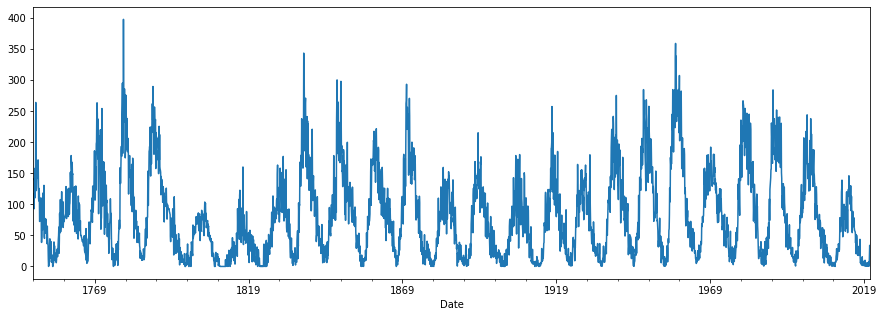

In [16]:
df.plot(figsize=(15,5))
plt.show()

***

## 5. Testing for Stationarity

There are multiple implementations of Unit Root tests like:

Augmented Dickey Fuller test (ADH Test)
Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
Philips Perron test (PP Test)
The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

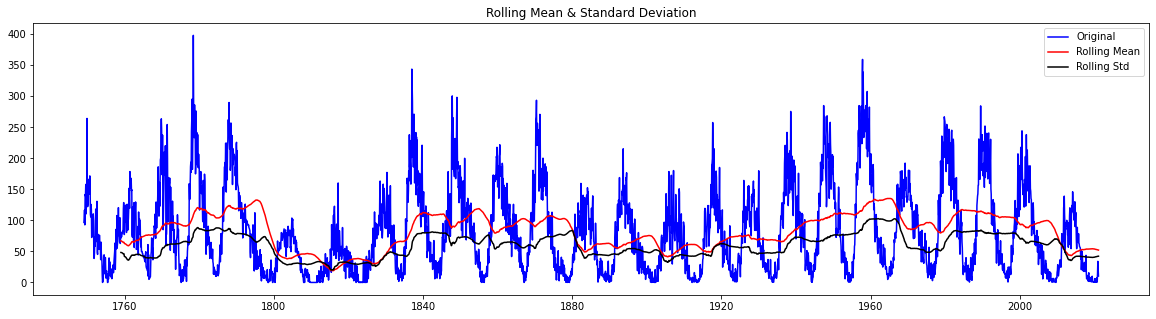

Results of Dickey-Fuller Test:
Test Statistic                -1.049705e+01
p-value                        1.108552e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.236000e+03
Critical Value (1%)           -3.432372e+00
Critical Value (5%)           -2.862434e+00
Critical Value (10%)          -2.567246e+00
dtype: float64


In [17]:
test_stationarity(df)


    
note: to calculate the rolling mean and the standard deviation, I've used the time period (k) as 120 months since the data appears to have 10 year cycles. 

***

## 6. Time Series Decomposition

Explicar pq não da pra usar o modelo multiplicativo

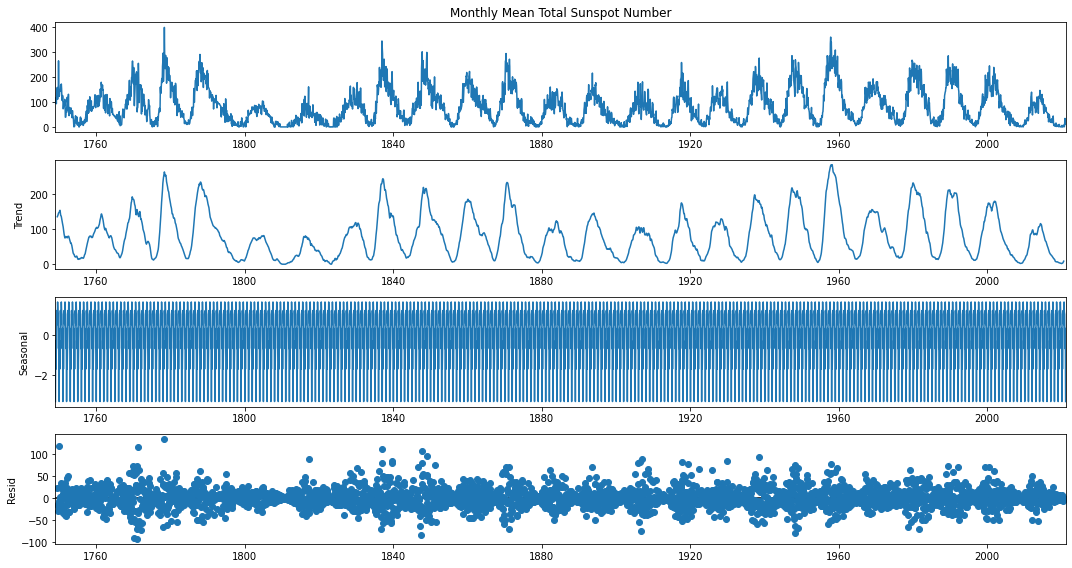

In [18]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

matplotlib.rcParams['figure.figsize'] = 15, 8
decomposition.plot()
plt.show()

***

# 7. Forecast Models

In [19]:
# Split time series data into training and test set

train_lenght = int(len(df)*0.8)

train_data = df[0: train_lenght] # train with the first 80% of the data
test_data = df[train_lenght:] # test with the last 20% of the data

### 7.1. Mean Model

description

In [20]:
y_hat_mean = test_data.copy()
y_hat_mean = y_hat_mean.apply(lambda x: df.mean())

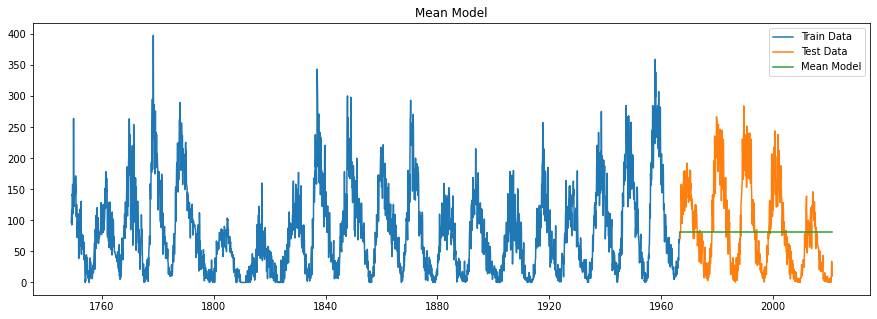

In [21]:
# Plotting the Mean Model Graph

plt.figure(figsize=(15,5))
plt.title('Mean Model')
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(y_hat_mean, label='Mean Model')
plt.legend(loc='best')
plt.show()

#### Calculating RMSE and MAPE

In [22]:
calculate_error(test, y_hat_mean)

NameError: name 'calculate_error' is not defined

### 7.2. Exponencial smoothing

add description, why testing with 3 different alphas? - 

In [23]:
fit_1 = SimpleExpSmoothing(train).fit(smoothing_level=0.2)
fit_2 = SimpleExpSmoothing(train).fit(smoothing_level=0.6)
fit_3 = SimpleExpSmoothing(train).fit() #auto

NameError: name 'train' is not defined

In [24]:
# Explain why '653 was used'

fcast_1 = fit_1.forecast(653)
fcast_2 = fit_2.forecast(653)
fcast_3 = fit_3.forecast(653)

NameError: name 'fit_1' is not defined

NameError: name 'train' is not defined

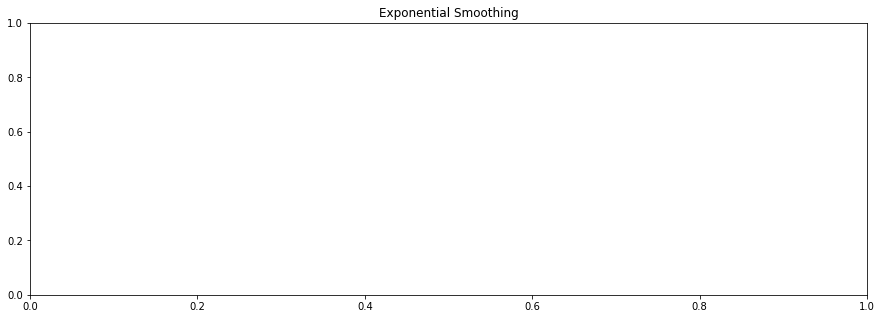

In [25]:
# Plotting the Exponential Smoothing Graph
plt.rcParams.update({'figure.figsize':(15,5)})

plt.title('Exponential Smoothing')
plt.plot(train, label='Train data')
plt.plot(test, label='Test data')
plt.plot(fcast_1, label='Exponential Smoothing 0.2')
plt.plot(fcast_2, label='Exponential Smoothing 0.6')
plt.plot(fcast_3, label='Exponential Smoothing auto')
plt.legend(loc='best')
plt.show()

In [26]:
timeseries_accuracy(test, fcast_1)

NameError: name 'test' is not defined

In [27]:
timeseries_accuracy(test, fcast_2)

NameError: name 'test' is not defined

In [28]:
timeseries_accuracy(test, fcast_3)

NameError: name 'test' is not defined

Selecionar a fcast_2 para colocar no df

### 7.3. ARIMA

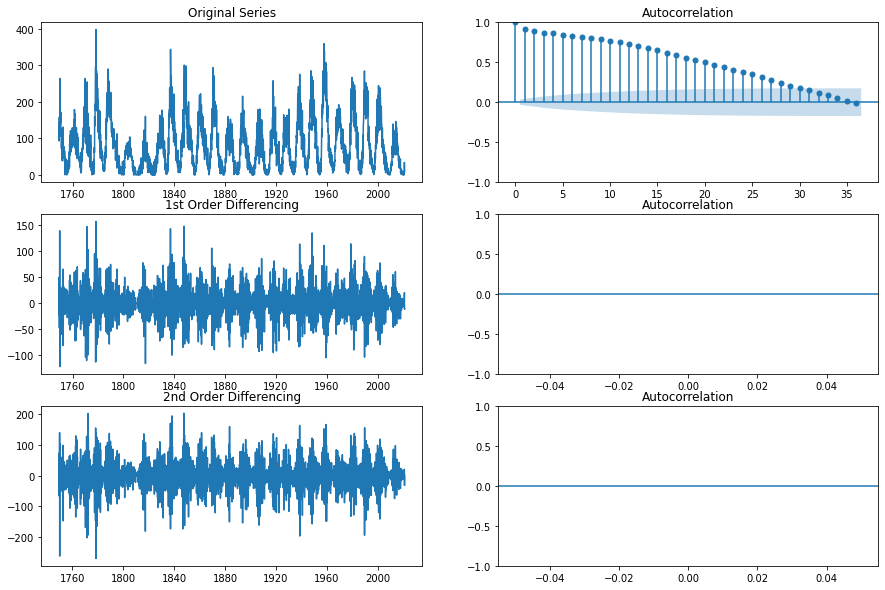

In [29]:
plt.rcParams.update({'figure.figsize':(15,10)})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(df)
axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()) 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff(), ax=axes[2, 1]);

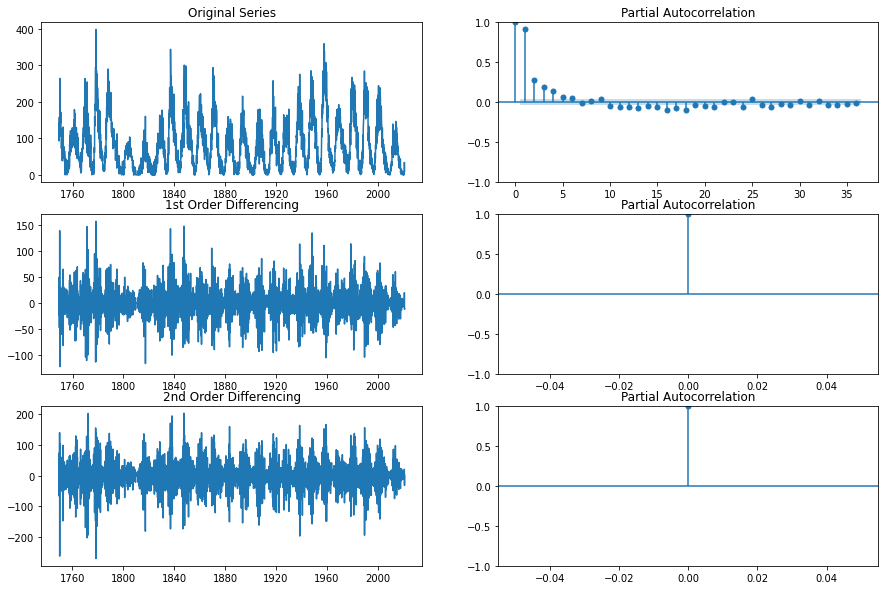

In [30]:
plt.rcParams.update({'figure.figsize':(15,10)})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(df)
axes[0, 0].set_title('Original Series')
plot_pacf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()) 
axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df.diff(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df.diff(), ax=axes[2, 1]);

#### d = 0   
Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

## Another try to understand

https://www.projectpro.io/article/how-to-build-arima-model-in-python/544#:~:text=Model%20in%20Python%3F-,ARIMA%20Model%2D%20Complete%20Guide%20to%20Time%20Series%20Forecasting%20in%20Python,data%20to%20predict%20future%20values

## How to choose p, d and q for the ARIMA model:

### How to find the order of differencing (d):

you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

#### p = 0

### How to find the order of the AR term (p):

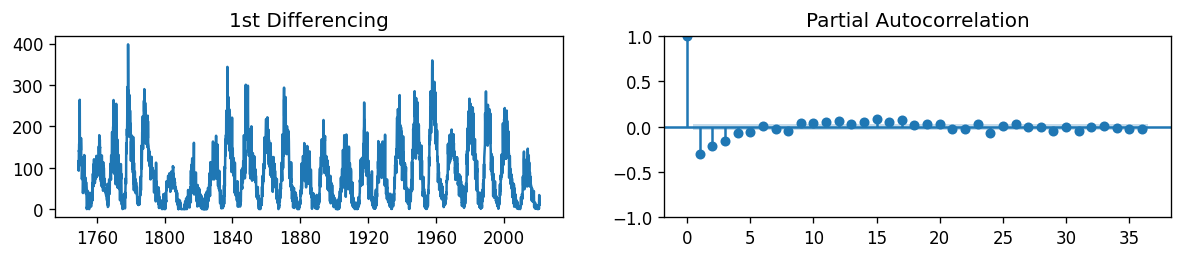

In [31]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(12,2), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.diff().dropna(), ax=axes[1])

plt.show()

#### Não entendi muito bem como definir o p. 

### How to find the order of the AR term (p):

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

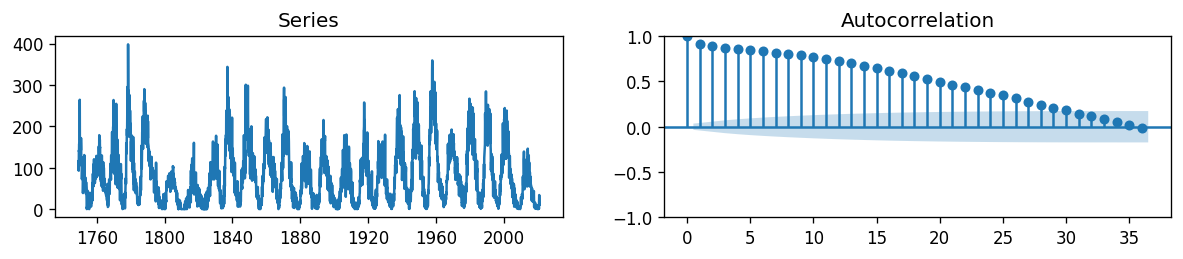

In [32]:
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df); axes[0].set_title('Series')
axes[1].set(ylim=(0,1.2))
plot_acf(df, ax=axes[1])

plt.show()

Couple of lags are well above the significance line. So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the Y.


Não entendi muito bem

### How to build the ARIMA Model

In [33]:
# 2,1,0 ARIMA Model
model = ARIMA(train, order=(2,1,0))
model_fit1 = model.fit()
print(model_fit.summary())

NameError: name 'train' is not defined

In [46]:
# 2,2,0 ARIMA Model
model = ARIMA(train_data, order=(2,2,0))
model_fit2 = model.fit()
print(model_fit2.summary())

                                       SARIMAX Results                                       
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 2612
Model:                                ARIMA(2, 2, 0)   Log Likelihood              -12854.637
Date:                               Fri, 08 Jul 2022   AIC                          25715.275
Time:                                       10:43:30   BIC                          25732.876
Sample:                                   01-31-1749   HQIC                         25721.651
                                        - 08-31-1966                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8270      0.012    -67.033      0.000      -0.851      -0.803
ar.L2      

In [35]:
# 0,3,2 ARIMA Model - Best Model
model = ARIMA(train, order=(0,3,2))
model_fit3 = model.fit()
print(model_fit.summary())

NameError: name 'train' is not defined

In [36]:
def aic_finder(timeseries, n=5):

    results = []

    #looping through all possible values of p, q, d
    for p in range(0,3):
        for q in range(0,4):
            for d in range(0,3):
                model = ARIMA(timeseries, order=(p,q,d))
                model_fit = model.fit()
                aic = int(model_fit.aic)

                results.append({'p, q, d':(p,q,d), 'AIC':aic})

    # Ordering by AIC value descending
    results_ord = sorted(results, key = lambda i: i['AIC'])

    # Saving in a dataframe for better visualization
    results_df = pd.DataFrame(results_ord)
    
    return results_df.head(n);

In [37]:
aic_finder(train)

NameError: name 'train' is not defined

### Final coeficients

fiquei na dúvida aqui também, fui chutando alguns valores e tentei achar os menores erros. Mas tem um ponto, qual metrica olhar?
- AIC?
- std_err?


In [38]:
# Plot residual errors (0,3,2)
residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

NameError: name 'model_fit1' is not defined

In [39]:
# Plot residual errors (2,1,0)
residuals = pd.DataFrame(model_fit2.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

NameError: name 'model_fit2' is not defined

In [40]:
# Plot residual errors (2,1,0) - lowest AIC
residuals = pd.DataFrame(model_fit3.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

NameError: name 'model_fit3' is not defined

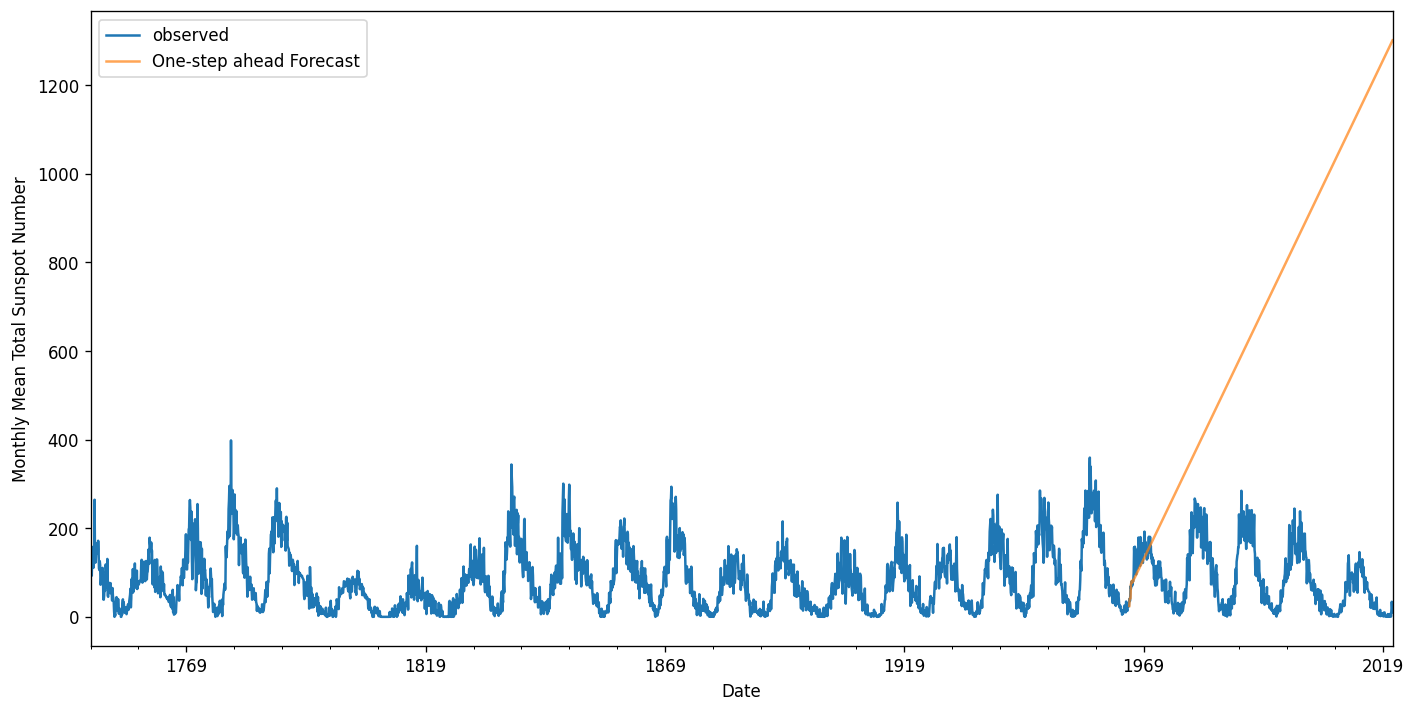

In [50]:
# Actual vs Fitted
pred = model_fit2.get_prediction(start=pd.to_datetime('1966-01-31'), end=pd.to_datetime('2021-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = df.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Mean Total Sunspot Number')
plt.legend()
plt.show()

In [42]:
calculate_error(test, pred.predicted_mean)

NameError: name 'calculate_error' is not defined

In [43]:
forecast_accuracy(test, pred.predicted_mean[8:])

NameError: name 'forecast_accuracy' is not defined

# Bibliography

* Hyndman, R. J., & Koehler, A. B. (2006). Another look at measures of forecast accuracy. International Journal of Forecasting, 22(4), 679–688. [DOI]
* Forecasting: principles and practice, 2013.
* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/